In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import seaborn as sns


In [ ]:
from google.colab import files
file=files.upload()

Saving japan.csv to japan.csv


In [ ]:
df=read_csv("japan.csv",header=0)

In [ ]:
df.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths
436,Japan,2021-04-02,479953,2714.0,9191.0,18.0
437,Japan,2021-04-03,482704,2751.0,9198.0,7.0
438,Japan,2021-04-04,485226,2522.0,9210.0,12.0
439,Japan,2021-04-05,486792,1566.0,9229.0,19.0
440,Japan,2021-04-06,489407,2615.0,9251.0,22.0


In [ ]:
df.shape

(441, 6)

In [ ]:
new_df=pd.DataFrame(df,columns=["date","total_deaths"])
new_df.head()

,date,total_deaths
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [ ]:
new_df.columns=['ds','y']
new_df.head()


,ds,y
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [ ]:
new_df['ds']= pd.to_datetime(new_df['ds'])
new_df.head()

,ds,y
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [ ]:
train=new_df.drop(new_df.index[-10:])

In [ ]:
train.shape

(431, 2)

In [ ]:
train.tail()

,ds,y
426,2021-03-23,8908.0
427,2021-03-24,8929.0
428,2021-03-25,8956.0
429,2021-03-26,8989.0
430,2021-03-27,9021.0


In [ ]:
model=Prophet()
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


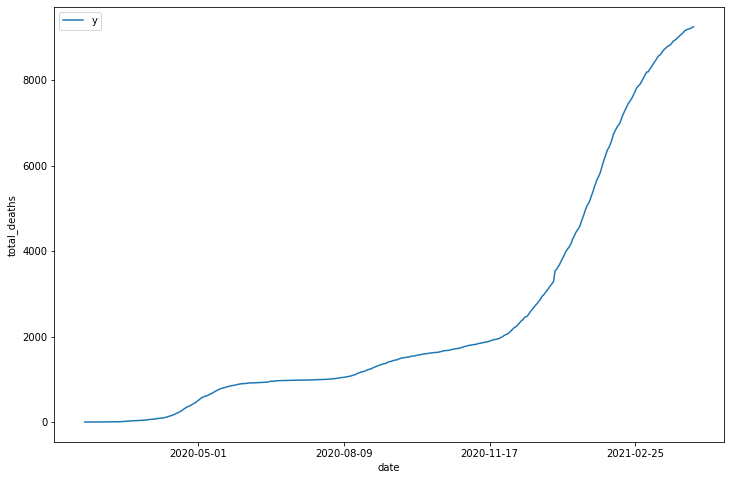

In [ ]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('total_deaths')
ax.set_xlabel('date')

plt.show()

In [ ]:
future_dates=model.make_future_dataframe(periods=60)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
486,2021-05-22
487,2021-05-23
488,2021-05-24
489,2021-05-25


In [ ]:
future = model.make_future_dataframe(periods=2, freq='D')
prediction = model.predict(future)
prediction[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
426,2021-03-23,9303.664653,9173.547639,9440.588717
427,2021-03-24,9375.380776,9230.944984,9509.876763
428,2021-03-25,9445.286719,9295.625063,9580.347772
429,2021-03-26,9519.857558,9388.010905,9657.078930
430,2021-03-27,9585.346158,9443.101573,9720.666362
431,2021-03-28,9658.248266,9521.536805,9798.694676
432,2021-03-29,9725.764538,9583.638394,9861.648231


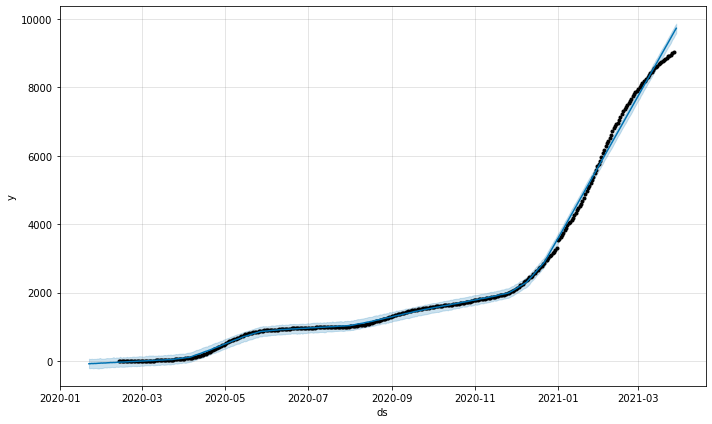

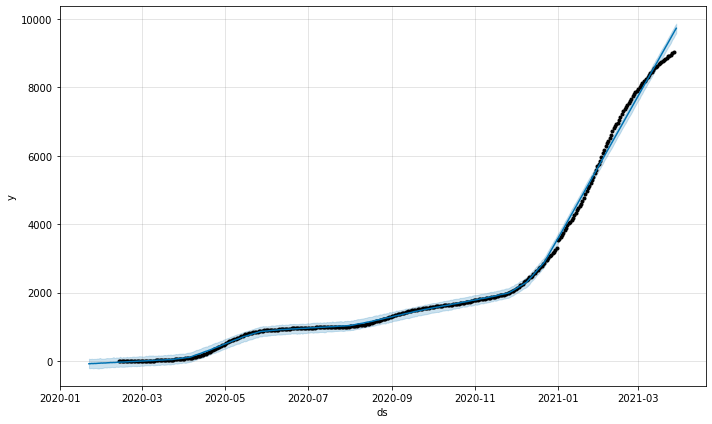

In [ ]:
model.plot(prediction)

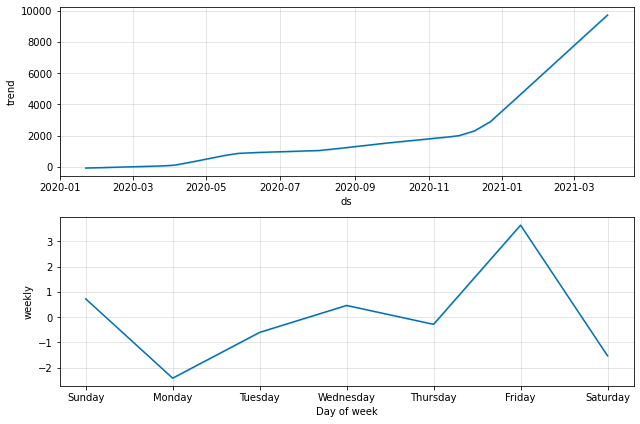

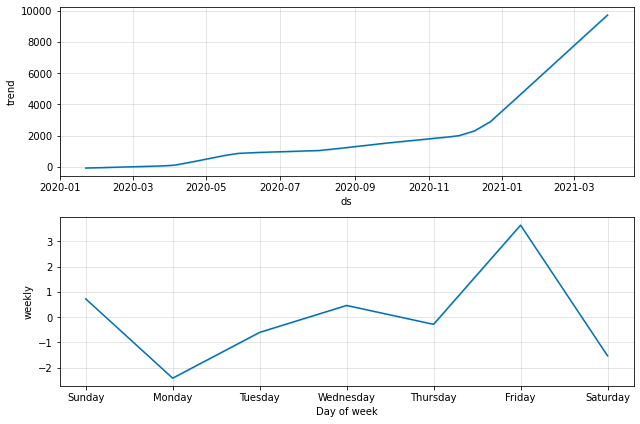

In [ ]:
model.plot_components(prediction)

In [ ]:
new_df=df[['date','new_deaths']]
new_df['ds']=new_df['date']
new_df['y']=new_df['new_deaths']
new_df.drop(columns=['date','new_deaths'], inplace=True)
new_df.head()

In [ ]:
from fbprophet import Prophet
model=Prophet()
model.fit(new_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


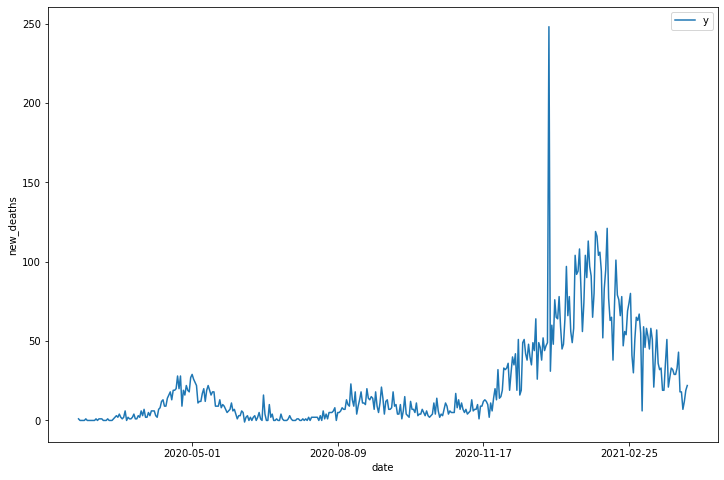

In [ ]:
ax = new_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('new_deaths')
ax.set_xlabel('date')
plt.show()

In [ ]:
future = model.make_future_dataframe(periods=1)
future.tail()

,ds
437,2021-04-03
438,2021-04-04
439,2021-04-05
440,2021-04-06
441,2021-04-07


In [ ]:
forecast=model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
435,2021-04-01,42.938365,23.732355,61.748345
436,2021-04-02,47.903292,26.855199,67.837511
437,2021-04-03,38.385619,18.995403,58.456150
438,2021-04-04,35.289575,16.841006,55.066479
439,2021-04-05,39.321817,19.438198,60.836823
440,2021-04-06,43.854992,24.767389,64.986767
441,2021-04-07,43.581328,21.903581,62.781666


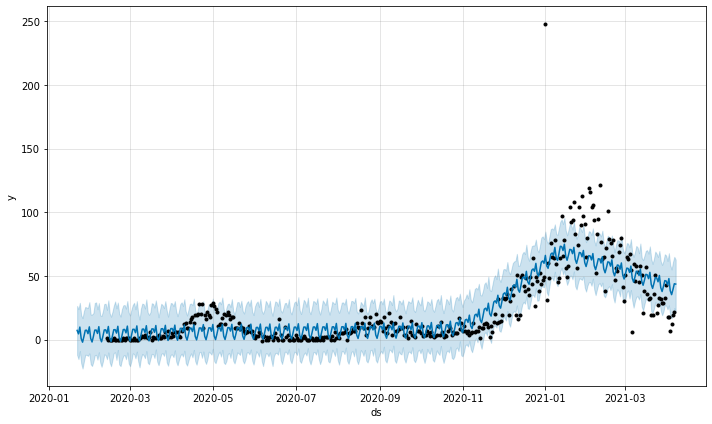

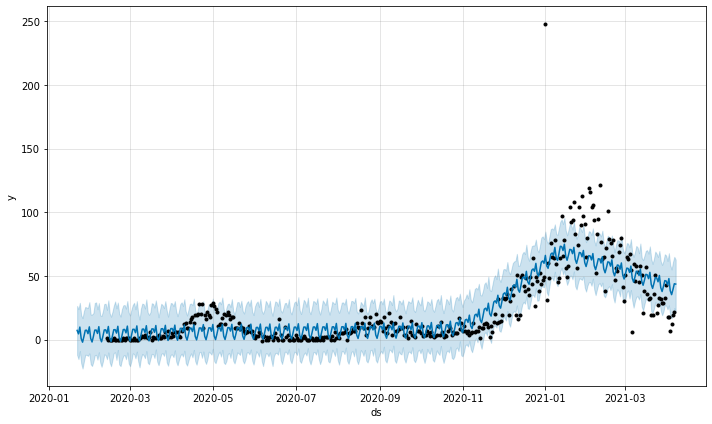

In [ ]:
model.plot(forecast)

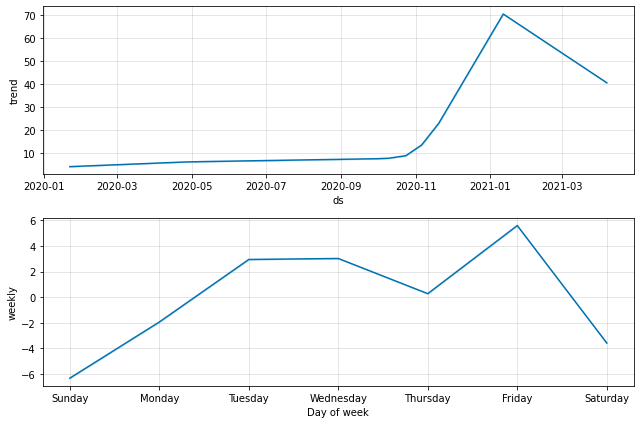

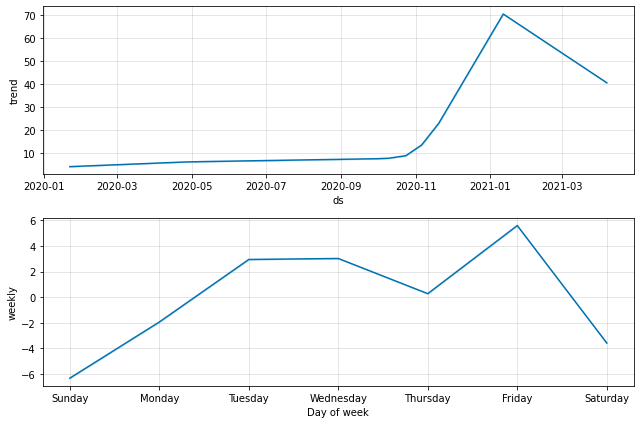

In [ ]:
model.plot_components(forecast)